In [1]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [28]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
import random
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,ShuffleSplit,LeavePOut  
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

In [29]:
dataset= pd.read_csv('titanic.csv')

In [30]:
dataset.shape

(891, 12)

In [31]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
#null values so we need to first fill all the null values.

dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
#Replacing all the null values of Age column with the average age of the whole column.
dataset["Age"].fillna(dataset['Age'].mean(), inplace = True)

In [35]:
print(dataset['Embarked'].unique())
print('\n')
dataset['Embarked'].value_counts()


['S' 'C' 'Q' nan]




S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
#replacing with the mode value i.e. the one with the highest frequency.

dataset['Embarked'].fillna(dataset['Embarked'].value_counts().index[0], inplace=True)
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
#As seen from the dataset ['Cabin','PassengerId','Name','Ticket'] are of no use. Our prediction will not be hampered because of dropping these values.
dataset.drop(['Cabin'], axis=1, inplace=True)
dataset.drop(['PassengerId'], axis=1, inplace=True) 
dataset.drop(['Name'], axis=1, inplace=True) 
dataset.drop(['Ticket'], axis=1, inplace=True)            

In [38]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
dataset.shape

(891, 8)

####Converting categorical variable to numerical

In [40]:
dataset['Sex'].replace({'male': 1,'female': 0}, inplace=True)
dataset['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [41]:
dataset ['Embarked'].replace({'S': 0,'C': 1,'Q': 2}, inplace=True)
dataset ['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [42]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [43]:
dataset.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


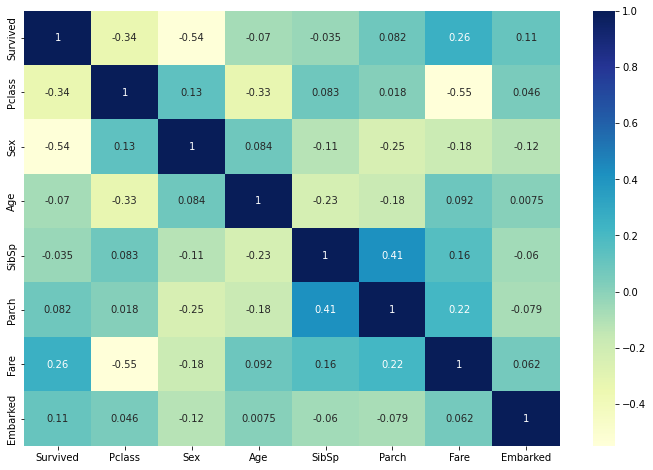

In [44]:
plt.figure(figsize=(12, 8))                    #used to manipulate the size of the plots.
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

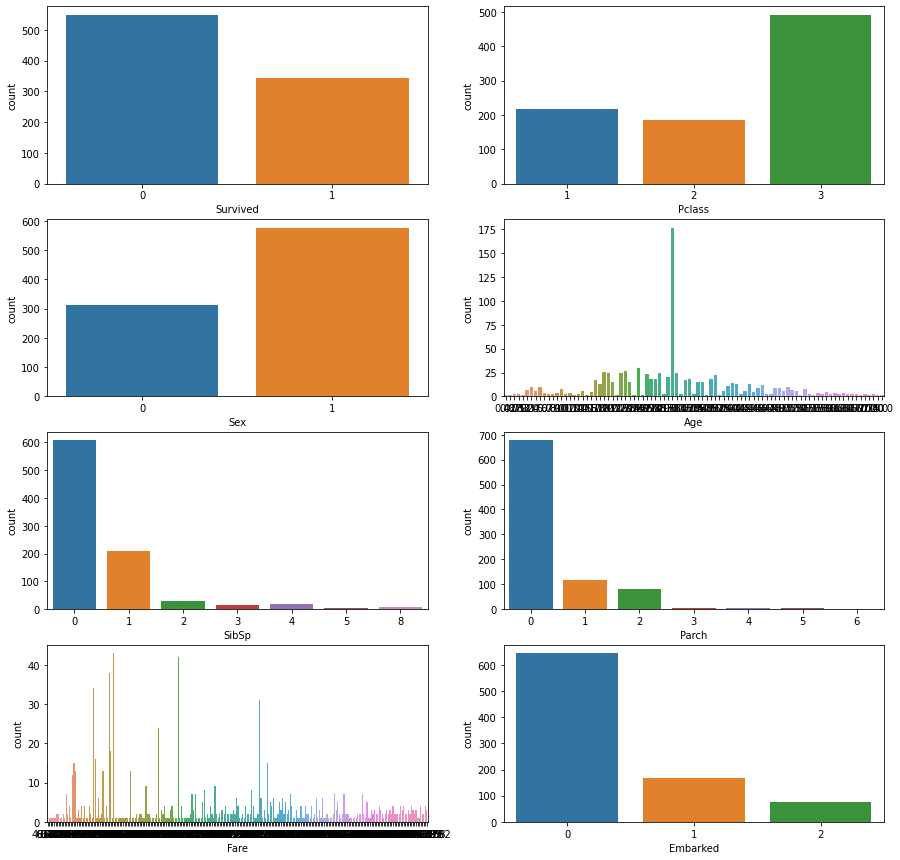

In [45]:
plt.figure(figsize=(15, 15))
columns = list(dataset.columns)
for i in range(len(columns)):
  plt.subplot(4, 2, i+1)
  sns.countplot(dataset[columns[i]])
plt.show()

####Conclusion: Except 2 variables (Fare,Age) all are categorical variables.

In [46]:
#Making x and y datsets seperately.
x = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']
print(x.shape)
print(y.shape)

(891, 7)
(891,)


#Feature Selection

#####In machine learning, feature selection is the procedure of selecting important features from the data so that the output of the model can be accurate and according to the requirement.In feature selection, we try to find out input variables from the set of input variables which are possessing a strong relationship with the target variable.

#####**SNS:** The algorithm selects multiple features from the set of features and evaluates them for model iterate number between the different sets with reducing and improving the number of features so that the model can meet the optimal performance and results.

In [47]:
# Define Sequential Forward Selection (sfs)
sffs = SFS(LogisticRegression(),k_features='best',forward=True,floating=True,scoring = 'roc_auc',cv = 0)

In [48]:
sffs.fit(x, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(), floating=True,
                          k_features=(1, 7), scoring='roc_auc')

In [49]:
df_sffs_results = pd.DataFrame(sffs.subsets_).transpose()
df_sffs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.7668727830505226],0.766873,"(Sex,)"
2,"(0, 1)",[0.8328353518891338],0.832835,"(Pclass, Sex)"
3,"(0, 1, 2)",[0.8478014252388713],0.847801,"(Pclass, Sex, Age)"
4,"(0, 1, 2, 3)",[0.8550075096666986],0.855008,"(Pclass, Sex, Age, SibSp)"
5,"(0, 1, 2, 3, 5)",[0.8560647216097317],0.856065,"(Pclass, Sex, Age, SibSp, Fare)"
6,"(0, 1, 2, 3, 5, 6)",[0.8567251461988303],0.856725,"(Pclass, Sex, Age, SibSp, Fare, Embarked)"
7,"(0, 1, 2, 3, 4, 5, 6)",[0.8566958531727011],0.856696,"(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)"


From the table above, we can see that the avg ROC_AUC score for the combination ('Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked') is maximum among all. So this combination can be the best choice for making our model.


In [50]:
# Printing the combination of best features for our model.
print("Feature Names: ")
sffs.k_feature_names_

Feature Names: 


('Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked')

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

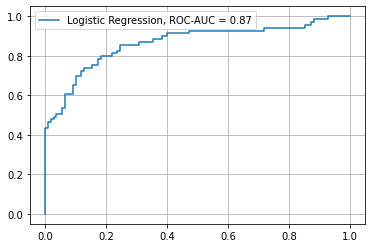

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = round(roc_auc_score(y_test, y_pred), 2)

plt.plot(fpr, tpr, label="Logistic Regression, ROC-AUC = " + str(auc_score))
plt.legend()
plt.grid()
plt.show()

#####Yes, In my opinion, this approach is greedy about finding the best subset having the maximum performance measure.This method of feature selection comes under the category of "Wrapper Methods". 
#####There are basically three types of wrapper methods: (Forward Selection,Backward Selection, Step-wise selection) 
#####I'm using Step-wise selection. It is basically the combination of both forward and backward selection methods. This approach is greedy because, it takes every subset of the features, and tries to find the performance of each possibility, and then returns the subset having maximum performance score.